
## Filters for game scraping by theme

I tried to use the code of this guy
https://github.com/mmmmmm44/steam_scraping_api/blob/main/scrape_categories/README.md
Could not really test much but it looks like it might be what we need
I limited the results and added some timers because steam was already flagging me....



|   “filter” value    | Description              
| “” (empty)          | The default value of the “filter” field, to display all games on Steam. Usually used with field “sorted_by”=”Released_DESC” to display all games on Steam from the latest release date to the earliest. |
| “popularnew”        | Corresponds to the “New & Trending” tab                                                                                
| “topsellers”        | Corresponds to the “Top Sellers” tab                                                                                   
| “globaltopsellers”  | Corresponds to the “Global Top Sellers” button next to the “See more:” phrase in the bottom of the list of “TopSellers” tab                                                                            |
| “popularcomingsoon” | Corresponds to the “Popular Upcoming” 

In [109]:
# Imports and Helper functions

from datetime import datetime
import time
import requests
import pickle
from pathlib import Path
import re
import random

import pandas as pd

In [76]:
app_ids = pd.read_csv("data/y_variable.csv")["App ID"].tolist()
app_ids[0:10]

[251570,
 1099410,
 1808500,
 2399830,
 427410,
 1904480,
 1385380,
 1669000,
 270880,
 3274580]

In [77]:
def print_log(*args):
    print(f"[{str(datetime.now())[:-3]}] ", end="")
    print(*args)
    
def get_app_details(appid):
    while(True):
        if appid == None:
            print_log("App Id is None.")
            return {}

        appdetails_req = requests.get(
            "https://store.steampowered.com/api/appdetails/",
            params={"appids": appid, "cc": "hk", "l": "english"})        # change the countrycode to the region you are staying with
        
        if appdetails_req.status_code == 200:
            appdetails = appdetails_req.json()
            appdetails = appdetails[str(appid)]
            print_log(f"App Id: {appid} - {appdetails['success']}")
            break

        elif appdetails_req.status_code == 429:
            print_log(f'Too many requests. Sleep for 10 sec')
            time.sleep(10)
            continue

        elif appdetails_req.status_code == 403:
            print_log(f'Forbidden to access. Sleep for 5 min.')
            time.sleep(5 * 60)
            continue

        else:
            print_log("ERROR: status code:", appdetails_req.status_code)
            print_log(f"Error in App Id: {appid}.")
            appdetails = {}
            break

    return appdetails

def safe_sleep():
    time.sleep(random.uniform(1.2, 3.5))

In [78]:
appdetails = get_app_details(app_ids[1])
# [appdetails]
sample_df = pd.DataFrame([appdetails['data']])
sample_df.columns

sample_df[['name', 'steam_appid', 'required_age', 'is_free',
       'dlc','price_overview',
       'categories', 'genres',
       'recommendations', 'achievements', 'release_date', 'support_info',
       'background', 'background_raw', 'content_descriptors', 'ratings']]

# print(sample_df['name'].tolist())
# print(sample_df['categories'].tolist())
# print(sample_df['genres'].tolist())

[2025-12-08 14:32:21.942] App Id: 1099410 - True


,name,steam_appid,required_age,is_free,dlc,price_overview,categories,genres,recommendations,achievements,release_date,support_info,background,background_raw,content_descriptors,ratings
0,A Total War Saga: TROY,1099410,0,False,"[1553060, 1486710, 1553061, 1188790, 1353190, ...","{'currency': 'HKD', 'initial': 25800, 'final':...","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 2987},"{'total': 69, 'highlighted': [{'name': 'Homer'...","{'coming_soon': False, 'date': '2 Sep, 2021'}","{'url': 'https://support.sega.co.uk', 'email':...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Gameplay consists of...","{'esrb': {'rating': 't', 'descriptors': 'Alcoh..."


In [79]:
app_data = sample_df['genres'].tolist()

genre_description_set = set()
for genre_list in app_data:
    for genre in genre_list:
        genre_description_set.add(genre['description'])
genre_description_set
        

{'Action', 'Simulation', 'Strategy'}

In [80]:
# request for game information using appid
df_list = []

for appid in app_ids:
    appdetails = get_app_details(appid)
    if appdetails['success']:
        df_list.append(appdetails['data'])
    safe_sleep()

app_details_df = pd.DataFrame(df_list)
app_details_df.head()

[2025-12-08 14:32:23.524] App Id: 251570 - True
[2025-12-08 14:32:26.726] App Id: 1099410 - True
[2025-12-08 14:32:29.046] App Id: 1808500 - True
[2025-12-08 14:32:31.837] App Id: 2399830 - True
[2025-12-08 14:32:34.143] App Id: 427410 - True
[2025-12-08 14:32:35.852] App Id: 1904480 - True
[2025-12-08 14:32:37.514] App Id: 1385380 - True
[2025-12-08 14:32:40.578] App Id: 1669000 - True
[2025-12-08 14:32:43.768] App Id: 270880 - True
[2025-12-08 14:32:47.214] App Id: 3274580 - True
[2025-12-08 14:32:50.599] App Id: 1887840 - True
[2025-12-08 14:32:53.211] App Id: 1172470 - True
[2025-12-08 14:32:56.870] App Id: 1540210 - True
[2025-12-08 14:32:59.741] App Id: 107410 - True
[2025-12-08 14:33:02.272] App Id: 1874880 - True
[2025-12-08 14:33:05.591] App Id: 244210 - True
[2025-12-08 14:33:08.268] App Id: 3058630 - True
[2025-12-08 14:33:11.277] App Id: 3917090 - True
[2025-12-08 14:33:13.501] App Id: 2840770 - True
[2025-12-08 14:33:15.817] App Id: 2062430 - True
[2025-12-08 14:33:17.515]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,release_date,support_info,background,background_raw,content_descriptors,ratings,drm_notice,metacritic,ext_user_account_notice,demos
0,game,7 Days to Die,251570,0,False,full,"[2721510, 3314750, 3486400, 3635260]","<p class=""bb_paragraph"" ><span class=""bb_img_c...","<p class=""bb_paragraph"" ><span class=""bb_img_c...",7 Days to Die is an open-world game that is a ...,...,"{'coming_soon': False, 'date': '25 Jul, 2024'}","{'url': 'http://7daystodie.com/support', 'emai...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Explicit Violence S...","{'esrb': {'rating': 'm', 'descriptors': 'Inten...",NaN,NaN,NaN,NaN
1,game,A Total War Saga: TROY,1099410,0,False,NaN,"[1553060, 1486710, 1553061, 1188790, 1353190, ...","<span class=""bb_img_ctn""><video class=""bb_img""...","<span class=""bb_img_ctn""><video class=""bb_img""...",Inspired by The Iliad and brought to life thro...,...,"{'coming_soon': False, 'date': '2 Sep, 2021'}","{'url': 'https://support.sega.co.uk', 'email':...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Gameplay consists of...","{'esrb': {'rating': 't', 'descriptors': 'Alcoh...",Denuvo Anti-tamper,NaN,NaN,NaN
2,game,ARC Raiders,1808500,0,False,full,[3948510],<h1>ARC Raiders Deluxe Edition</h1><p><p class...,"<h2 class=""bb_tag"" >SCAVENGE, SURVIVE, THRIVE ...",ARC Raiders is a multiplayer extraction advent...,...,"{'coming_soon': False, 'date': '30 Oct, 2025'}","{'url': 'https://arcraiders.com/', 'email': ''}",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [], 'notes': None}","{'csrr': {'rating': 'C15', 'descriptors': 'Car...",NaN,NaN,NaN,NaN
3,game,ARK: Survival Ascended,2399830,0,False,full,"[3720100, 2881150, 3483400, 3720200, 3282470, ...","<p class=""bb_paragraph"" >Respawn into a new di...","<p class=""bb_paragraph"" >Respawn into a new di...",ARK is reimagined from the ground-up into the ...,...,"{'coming_soon': False, 'date': '25 Oct, 2023'}",{'url': 'https://support.survivetheark.com/hc/...,https://store.akamai.steamstatic.com/images/st...,https://store.akamai.steamstatic.com/images/st...,"{'ids': [], 'notes': None}","{'esrb': {'rating': 't', 'descriptors': 'Viole...",NaN,NaN,NaN,NaN
4,game,Abiotic Factor,427410,0,False,full,"[4026970, 3641780]","<h1>Roadmap</h1><p><p class=""bb_paragraph"" ><s...","<p class=""bb_paragraph"" ><span class=""bb_img_c...",Abiotic Factor is a survival crafting experien...,...,"{'coming_soon': False, 'date': '22 Jul, 2025'}","{'url': 'https://www.deepfield.games/', 'email...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Abiotic Factor conta...","{'dejus': {'rating_generated': '1', 'rating': ...",NaN,NaN,NaN,NaN


In [81]:
app_details_df.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,release_date,support_info,background,background_raw,content_descriptors,ratings,drm_notice,metacritic,ext_user_account_notice,demos
0,game,7 Days to Die,251570,0,False,full,"[2721510, 3314750, 3486400, 3635260]","<p class=""bb_paragraph"" ><span class=""bb_img_c...","<p class=""bb_paragraph"" ><span class=""bb_img_c...",7 Days to Die is an open-world game that is a ...,...,"{'coming_soon': False, 'date': '25 Jul, 2024'}","{'url': 'http://7daystodie.com/support', 'emai...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Explicit Violence S...","{'esrb': {'rating': 'm', 'descriptors': 'Inten...",NaN,NaN,NaN,NaN
1,game,A Total War Saga: TROY,1099410,0,False,NaN,"[1553060, 1486710, 1553061, 1188790, 1353190, ...","<span class=""bb_img_ctn""><video class=""bb_img""...","<span class=""bb_img_ctn""><video class=""bb_img""...",Inspired by The Iliad and brought to life thro...,...,"{'coming_soon': False, 'date': '2 Sep, 2021'}","{'url': 'https://support.sega.co.uk', 'email':...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Gameplay consists of...","{'esrb': {'rating': 't', 'descriptors': 'Alcoh...",Denuvo Anti-tamper,NaN,NaN,NaN
2,game,ARC Raiders,1808500,0,False,full,[3948510],<h1>ARC Raiders Deluxe Edition</h1><p><p class...,"<h2 class=""bb_tag"" >SCAVENGE, SURVIVE, THRIVE ...",ARC Raiders is a multiplayer extraction advent...,...,"{'coming_soon': False, 'date': '30 Oct, 2025'}","{'url': 'https://arcraiders.com/', 'email': ''}",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [], 'notes': None}","{'csrr': {'rating': 'C15', 'descriptors': 'Car...",NaN,NaN,NaN,NaN
3,game,ARK: Survival Ascended,2399830,0,False,full,"[3720100, 2881150, 3483400, 3720200, 3282470, ...","<p class=""bb_paragraph"" >Respawn into a new di...","<p class=""bb_paragraph"" >Respawn into a new di...",ARK is reimagined from the ground-up into the ...,...,"{'coming_soon': False, 'date': '25 Oct, 2023'}",{'url': 'https://support.survivetheark.com/hc/...,https://store.akamai.steamstatic.com/images/st...,https://store.akamai.steamstatic.com/images/st...,"{'ids': [], 'notes': None}","{'esrb': {'rating': 't', 'descriptors': 'Viole...",NaN,NaN,NaN,NaN
4,game,Abiotic Factor,427410,0,False,full,"[4026970, 3641780]","<h1>Roadmap</h1><p><p class=""bb_paragraph"" ><s...","<p class=""bb_paragraph"" ><span class=""bb_img_c...",Abiotic Factor is a survival crafting experien...,...,"{'coming_soon': False, 'date': '22 Jul, 2025'}","{'url': 'https://www.deepfield.games/', 'email...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Abiotic Factor conta...","{'dejus': {'rating_generated': '1', 'rating': ...",NaN,NaN,NaN,NaN


In [82]:
app_data = app_details_df['categories'].tolist()

categories_description_set = set()
for categories_list in app_data:
    for categories in categories_list:
        categories_description_set.add(categories['description'])
categories_description_set

{'Adjustable Difficulty',
 'Adjustable Text Size',
 'Camera Comfort',
 'Captions available',
 'Chat Speech-to-text',
 'Chat Text-to-speech',
 'Co-op',
 'Color Alternatives',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Custom Volume Controls',
 'Family Sharing',
 'Full controller support',
 'HDR available',
 'In-App Purchases',
 'Includes Source SDK',
 'Includes level editor',
 'Keyboard Only Option',
 'LAN Co-op',
 'LAN PvP',
 'MMO',
 'Mouse Only Option',
 'Multi-player',
 'Narrated Game Menus',
 'Online Co-op',
 'Online PvP',
 'Partial Controller Support',
 'Playable without Timed Input',
 'PvP',
 'Remote Play Together',
 'Remote Play on Phone',
 'Remote Play on TV',
 'Remote Play on Tablet',
 'Save Anytime',
 'Shared/Split Screen',
 'Shared/Split Screen Co-op',
 'Shared/Split Screen PvP',
 'Single-player',
 'Stats',
 'Steam Achievements',
 'Steam Cloud',
 'Steam Leaderboards',
 'Steam Timeline',
 'Steam Trading Cards',
 'Steam Workshop',
 'SteamVR Collectibles',
 'Stere

In [83]:
app_data = app_details_df['genres'].tolist()

genre_description_set = set()
for genre_list in app_data:
    for genre in genre_list:
        genre_description_set.add(genre['description'])
genre_description_set

{'Action',
 'Adventure',
 'Animation & Modeling',
 'Casual',
 'Design & Illustration',
 'Early Access',
 'Free To Play',
 'Indie',
 'Massively Multiplayer',
 'Photo Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Sports',
 'Strategy',
 'Utilities'}

In [84]:
app_details_df.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,release_date,support_info,background,background_raw,content_descriptors,ratings,drm_notice,metacritic,ext_user_account_notice,demos
0,game,7 Days to Die,251570,0,False,full,"[2721510, 3314750, 3486400, 3635260]","<p class=""bb_paragraph"" ><span class=""bb_img_c...","<p class=""bb_paragraph"" ><span class=""bb_img_c...",7 Days to Die is an open-world game that is a ...,...,"{'coming_soon': False, 'date': '25 Jul, 2024'}","{'url': 'http://7daystodie.com/support', 'emai...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Explicit Violence S...","{'esrb': {'rating': 'm', 'descriptors': 'Inten...",NaN,NaN,NaN,NaN
1,game,A Total War Saga: TROY,1099410,0,False,NaN,"[1553060, 1486710, 1553061, 1188790, 1353190, ...","<span class=""bb_img_ctn""><video class=""bb_img""...","<span class=""bb_img_ctn""><video class=""bb_img""...",Inspired by The Iliad and brought to life thro...,...,"{'coming_soon': False, 'date': '2 Sep, 2021'}","{'url': 'https://support.sega.co.uk', 'email':...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Gameplay consists of...","{'esrb': {'rating': 't', 'descriptors': 'Alcoh...",Denuvo Anti-tamper,NaN,NaN,NaN
2,game,ARC Raiders,1808500,0,False,full,[3948510],<h1>ARC Raiders Deluxe Edition</h1><p><p class...,"<h2 class=""bb_tag"" >SCAVENGE, SURVIVE, THRIVE ...",ARC Raiders is a multiplayer extraction advent...,...,"{'coming_soon': False, 'date': '30 Oct, 2025'}","{'url': 'https://arcraiders.com/', 'email': ''}",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [], 'notes': None}","{'csrr': {'rating': 'C15', 'descriptors': 'Car...",NaN,NaN,NaN,NaN
3,game,ARK: Survival Ascended,2399830,0,False,full,"[3720100, 2881150, 3483400, 3720200, 3282470, ...","<p class=""bb_paragraph"" >Respawn into a new di...","<p class=""bb_paragraph"" >Respawn into a new di...",ARK is reimagined from the ground-up into the ...,...,"{'coming_soon': False, 'date': '25 Oct, 2023'}",{'url': 'https://support.survivetheark.com/hc/...,https://store.akamai.steamstatic.com/images/st...,https://store.akamai.steamstatic.com/images/st...,"{'ids': [], 'notes': None}","{'esrb': {'rating': 't', 'descriptors': 'Viole...",NaN,NaN,NaN,NaN
4,game,Abiotic Factor,427410,0,False,full,"[4026970, 3641780]","<h1>Roadmap</h1><p><p class=""bb_paragraph"" ><s...","<p class=""bb_paragraph"" ><span class=""bb_img_c...",Abiotic Factor is a survival crafting experien...,...,"{'coming_soon': False, 'date': '22 Jul, 2025'}","{'url': 'https://www.deepfield.games/', 'email...",https://store.akamai.steamstatic.com/images/st...,https://shared.akamai.steamstatic.com/store_it...,"{'ids': [2, 5], 'notes': 'Abiotic Factor conta...","{'dejus': {'rating_generated': '1', 'rating': ...",NaN,NaN,NaN,NaN


In [85]:
[isinstance(i, list) for i in app_details_df['dlc']]



[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 T

In [86]:
app_details_df['has_dlc'] = app_details_df['dlc'].apply(lambda x: isinstance(x, list))
app_details_df['has_dlc'].head(50)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16    False
17    False
18     True
19     True
20     True
21     True
22     True
23     True
24    False
25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39    False
40     True
41     True
42     True
43     True
44     True
45     True
46    False
47     True
48     True
49    False
Name: has_dlc, dtype: bool

In [87]:
genre_data = app_details_df['genres'].tolist()

genre_list = []

for genre_class in genre_data:
    app_genre_list = []
    for genre in genre_class:
        app_genre_list.append(genre['description'])
    genre_list.append(app_genre_list)
    
app_details_df["genre_list"] = genre_list
app_details_df["genre_list"].head(50)

0     [Action, Adventure, Indie, RPG, Simulation, St...
1                        [Action, Simulation, Strategy]
2                                              [Action]
3     [Action, Adventure, Indie, Massively Multiplay...
4                  [Action, Adventure, RPG, Simulation]
5                       [Action, Adventure, Indie, RPG]
6                     [Adventure, Indie, RPG, Strategy]
7                                       [RPG, Strategy]
8                                   [Indie, Simulation]
9                                [Simulation, Strategy]
10                           [Action, Adventure, Indie]
11                    [Action, Adventure, Free To Play]
12                                  [Action, Adventure]
13                       [Action, Simulation, Strategy]
14                       [Action, Simulation, Strategy]
15                  [Indie, Racing, Simulation, Sports]
16           [Racing, Simulation, Sports, Early Access]
17                               [Racing, Early 

In [88]:
for genre in list(genre_description_set):
    app_details_df[genre] = app_details_df['genre_list'].apply(lambda x: 1 if genre in x else 0)
app_details_df.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'supported_languages', 'reviews', 'header_image',
       'capsule_image', 'capsule_imagev5', 'website', 'pc_requirements',
       'mac_requirements', 'linux_requirements', 'legal_notice', 'developers',
       'publishers', 'price_overview', 'packages', 'package_groups',
       'platforms', 'categories', 'genres', 'screenshots', 'movies',
       'recommendations', 'achievements', 'release_date', 'support_info',
       'background', 'background_raw', 'content_descriptors', 'ratings',
       'drm_notice', 'metacritic', 'ext_user_account_notice', 'demos',
       'has_dlc', 'genre_list', 'Casual', 'Adventure', 'Sports',
       'Photo Editing', 'Design & Illustration', 'Indie', 'RPG', 'Action',
       'Massively Multiplayer', 'Free To Play', 'Strategy', 'Early Access',
       'Animation & Modeling', 'Simulation', 'Racing', 

In [89]:
app_details_df[['Casual', 'Adventure', 'Sports',
       'Photo Editing', 'Design & Illustration', 'Indie', 'RPG', 'Action',
       'Massively Multiplayer', 'Free To Play', 'Strategy', 'Early Access',
       'Animation & Modeling', 'Simulation', 'Racing', 'Utilities']]

,Casual,Adventure,Sports,Photo Editing,Design & Illustration,Indie,RPG,Action,Massively Multiplayer,Free To Play,Strategy,Early Access,Animation & Modeling,Simulation,Racing,Utilities
0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0
239,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
240,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
241,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [74]:
app_details_df[['steam_appid', 'is_free', 'Casual', 'Adventure', 'Sports',
       'Photo Editing', 'Design & Illustration', 'Indie', 'RPG', 'Action',
       'Massively Multiplayer', 'Free To Play', 'Strategy', 'Early Access',
       'Animation & Modeling', 'Simulation', 'Racing', 'Utilities']].to_csv("data/app_genres.csv")

In [91]:
categories_data = app_details_df['categories'].tolist()

categories_list = []

for categories_class in categories_data:
    app_categories_list = []
    for categories in categories_class:
        app_categories_list.append(categories['description'])
    categories_list.append(app_categories_list)
    
app_details_df["categories_list"] = categories_list
app_details_df["categories_list"].head(50)

0     [Single-player, Multi-player, PvP, Online PvP,...
1     [Single-player, Multi-player, PvP, Online PvP,...
2     [Multi-player, PvP, Online PvP, Co-op, Online ...
3     [Single-player, Multi-player, MMO, PvP, Online...
4     [Single-player, Multi-player, Co-op, Online Co...
5     [Single-player, Multi-player, Co-op, Online Co...
6     [Single-player, Multi-player, Co-op, Online Co...
7     [Single-player, Multi-player, PvP, Online PvP,...
8     [Single-player, Multi-player, Co-op, Online Co...
9     [Single-player, Multi-player, PvP, Online PvP,...
10    [Single-player, Steam Achievements, Full contr...
11    [Multi-player, PvP, Online PvP, Co-op, Online ...
12    [Single-player, Multi-player, Co-op, Online Co...
13    [Single-player, Multi-player, PvP, Online PvP,...
14    [Single-player, Multi-player, PvP, Online PvP,...
15    [Single-player, Multi-player, PvP, Online PvP,...
16    [Single-player, VR Supported, Partial Controll...
17    [Single-player, Full controller support, C

In [93]:
for categories in list(categories_description_set):
    app_details_df[categories] = app_details_df['categories_list'].apply(lambda x: 1 if categories in x else 0)
app_details_df.columns.tolist()

['type',
 'name',
 'steam_appid',
 'required_age',
 'is_free',
 'controller_support',
 'dlc',
 'detailed_description',
 'about_the_game',
 'short_description',
 'supported_languages',
 'reviews',
 'header_image',
 'capsule_image',
 'capsule_imagev5',
 'website',
 'pc_requirements',
 'mac_requirements',
 'linux_requirements',
 'legal_notice',
 'developers',
 'publishers',
 'price_overview',
 'packages',
 'package_groups',
 'platforms',
 'categories',
 'genres',
 'screenshots',
 'movies',
 'recommendations',
 'achievements',
 'release_date',
 'support_info',
 'background',
 'background_raw',
 'content_descriptors',
 'ratings',
 'drm_notice',
 'metacritic',
 'ext_user_account_notice',
 'demos',
 'has_dlc',
 'genre_list',
 'Casual',
 'Adventure',
 'Sports',
 'Photo Editing',
 'Design & Illustration',
 'Indie',
 'RPG',
 'Action',
 'Massively Multiplayer',
 'Free To Play',
 'Strategy',
 'Early Access',
 'Animation & Modeling',
 'Simulation',
 'Racing',
 'Utilities',
 'categories_list',
 'In-

In [ ]:
app_details_df[['steam_appid', 'is_free', 'Casual', 'Adventure', 'Sports',
       'Photo Editing', 'Design & Illustration', 'Indie', 'RPG', 'Action',
       'Massively Multiplayer', 'Free To Play', 'Strategy', 'Early Access',
       'Animation & Modeling', 'Simulation', 'Racing', 'Utilities']].to_csv("data/app_genres.csv")

In [103]:
[x['total'] if isinstance(x, dict) else None for x in app_details_df['recommendations']]

[266478,
 2987,
 163028,
 80878,
 35021,
 5561,
 10248,
 15206,
 154875,
 8062,
 15245,
 1571,
 1878,
 225064,
 37333,
 125619,
 11271,
 5092,
 6012,
 15439,
 142019,
 710926,
 102350,
 228019,
 331099,
 13084,
 107354,
 60576,
 330326,
 12615,
 35912,
 50251,
 2893,
 402006,
 147118,
 26880,
 5531,
 31802,
 5402,
 2086,
 56517,
 142527,
 332,
 21624,
 45010,
 4808261,
 3010,
 89560,
 95946,
 103,
 810053,
 81974,
 990,
 41356,
 21716,
 369647,
 627409,
 288912,
 561,
 132820,
 12200,
 20387,
 124670,
 14368,
 49669,
 None,
 25577,
 2478,
 793201,
 112607,
 80358,
 66807,
 2458,
 33676,
 103995,
 726259,
 18187,
 12992,
 266,
 75865,
 99731,
 184278,
 275506,
 70544,
 28251,
 2802,
 234020,
 44045,
 447592,
 53058,
 1089,
 24590,
 45561,
 116622,
 14769,
 415,
 1850,
 786884,
 47214,
 98417,
 228290,
 9769,
 262977,
 94066,
 254690,
 451629,
 337789,
 None,
 41636,
 195660,
 7170,
 5339,
 14032,
 108922,
 6754,
 908,
 711,
 19897,
 36581,
 1032,
 767457,
 401746,
 14695,
 5303,
 853,
 

In [105]:
app_details_df['recommendation_count'] = app_details_df['recommendations'].apply(lambda x: int(x['total']) if isinstance(x, dict) else None)
app_details_df['recommendation_count']

0      266478.0
1        2987.0
2      163028.0
3       80878.0
4       35021.0
         ...   
238      2007.0
239     60618.0
240      4406.0
241     25180.0
242    156296.0
Name: recommendation_count, Length: 243, dtype: float64

In [108]:
app_details_df[['type',
 'name',
 'steam_appid',
 'required_age',
 'recommendation_count',
 'has_dlc',
 'Casual',
 'Adventure',
 'Sports',
 'Photo Editing',
 'Design & Illustration',
 'Indie',
 'RPG',
 'Action',
 'Massively Multiplayer',
 'Free To Play',
 'Strategy',
 'Early Access',
 'Animation & Modeling',
 'Simulation',
 'Racing',
 'Utilities',
 'In-App Purchases',
 'Includes level editor',
 'Custom Volume Controls',
 'Shared/Split Screen',
 'Commentary available',
 'Valve Anti-Cheat enabled',
 'Chat Speech-to-text',
 'Adjustable Difficulty',
 'Single-player',
 'Camera Comfort',
 'Surround Sound',
 'Co-op',
 'Steam Leaderboards',
 'Shared/Split Screen Co-op',
 'Subtitle Options',
 'VR Only',
 'Color Alternatives',
 'Touch Only Option',
 'Chat Text-to-speech',
 'Partial Controller Support',
 'Playable without Timed Input',
 'Full controller support',
 'VR Supported',
 'Online PvP',
 'Keyboard Only Option',
 'SteamVR Collectibles',
 'Includes Source SDK',
 'Remote Play on Tablet',
 'Remote Play Together',
 'Save Anytime',
 'Remote Play on TV',
 'Shared/Split Screen PvP',
 'Online Co-op',
 'Steam Achievements',
 'Steam Timeline',
 'Remote Play on Phone',
 'Adjustable Text Size',
 'LAN PvP',
 'Mouse Only Option',
 'Captions available',
 'Stereo Sound',
 'Stats',
 'MMO',
 'Steam Workshop',
 'Family Sharing',
 'LAN Co-op',
 'Narrated Game Menus',
 'PvP',
 'Cross-Platform Multiplayer',
 'Steam Trading Cards',
 'Steam Cloud',
 'Tracked Controller Support',
 'VR Support',
 'HDR available',
 'Multi-player']].to_csv("data/app_metadata.csv")

In [121]:
app_df = pd.read_csv("data/app_metadata.csv")
app_df.iloc[:, 7:20]

,Casual,Adventure,Sports,Photo Editing,Design & Illustration,Indie,RPG,Action,Massively Multiplayer,Free To Play,Strategy,Early Access,Animation & Modeling
0,0,1,0,0,0,1,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,1,1,1,0,0,1,0
4,0,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,0,0,0,0,0,0,1,1,1,1,0,0
239,0,1,0,0,0,0,1,1,0,0,0,0,0
240,0,0,1,0,0,0,0,0,1,0,0,0,0
241,1,1,0,0,0,0,0,0,0,0,0,1,0


In [123]:
genre_table = app_details_df[[
 'Casual',
 'Adventure',
 'Sports',
 'Photo Editing',
 'Design & Illustration',
 'Indie',
 'RPG',
 'Action',
 'Massively Multiplayer',
 'Free To Play',
 'Strategy',
 'Early Access',
 'Animation & Modeling',
 'Simulation',
 'Racing',
 'Utilities',
 ]]

In [125]:
common_occurences = genre_table.T@genre_table

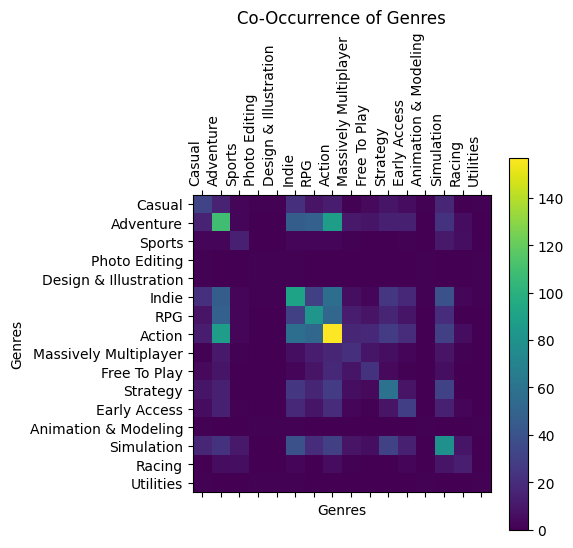

In [131]:
common_occurences = genre_table.T@genre_table
import matplotlib.pyplot as plt
plt.matshow(common_occurences)

# Define the genre names
genre_names = [
    'Casual',
    'Adventure',
    'Sports',
    'Photo Editing',
    'Design & Illustration',
    'Indie',
    'RPG',
    'Action',
    'Massively Multiplayer',
    'Free To Play',
    'Strategy',
    'Early Access',
    'Animation & Modeling',
    'Simulation',
    'Racing',
    'Utilities',
]

# Set the ticks and labels for both axes
plt.xticks(ticks=range(len(genre_names)), labels=genre_names, rotation=90, ha='right')
plt.yticks(ticks=range(len(genre_names)), labels=genre_names)

# Optionally, add a title and labels for the axes
plt.title('Co-Occurrence of Genres')
plt.xlabel('Genres')
plt.ylabel('Genres')

# Show the plot
plt.colorbar()  # Optional: to add a color bar
plt.show()